In [1]:
!pip install imblearn
!pip install seaborn

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import GradientBoostingClassifier
import seaborn as sns
from sklearn.cluster import DBSCAN

In [3]:
palette = ['#00777F', '#5BABF5', '#AADEFE', '#EAAC9F', '#8AA0AF']
sns.set_theme(context='notebook', palette=palette, style='darkgrid')
custom_cmap = sns.color_palette("Blues")

In [4]:
# Load dataset
data = pd.read_csv("/home/smruthi-bhat/Desktop/GPU_stuff/ML_project/creditcard.csv")

# Initial Exploration of Dataset
print(data.head())
print(data.info())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [5]:
X = data.drop('Class', axis=1)
y = data['Class']
# Feature Selection using Gradient Boosting for feature importance
feature_selector = GradientBoostingClassifier()
feature_selector.fit(X, y)
model = SelectFromModel(feature_selector, threshold="0.95*mean")

# Get selected feature indices and names
selected_feature_indices = model.get_support(indices=True)
selected_feature_names = X.columns[selected_feature_indices]
print("Selected feature names:", selected_feature_names)

# Transforming the dataset to keep only selected features
X_selected = model.transform(X)
print(f"Selected features shape: {X_selected.shape}")

# Balancing the dataset using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_selected, y)

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Selected feature names: Index(['V8', 'V14', 'V17', 'V26'], dtype='object')
Selected features shape: (284807, 4)


/home/smruthi-bhat/Desktop/GPU_stuff/venv/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [6]:
selected_feature_names

Index(['V8', 'V14', 'V17', 'V26'], dtype='object')

ROC AUC Score for Logistic Regression: 0.9592714051020169
Logistic Regression:
               precision    recall  f1-score   support

           0       0.89      0.98      0.93     56750
           1       0.98      0.87      0.92     56976

    accuracy                           0.93    113726
   macro avg       0.93      0.93      0.93    113726
weighted avg       0.93      0.93      0.93    113726



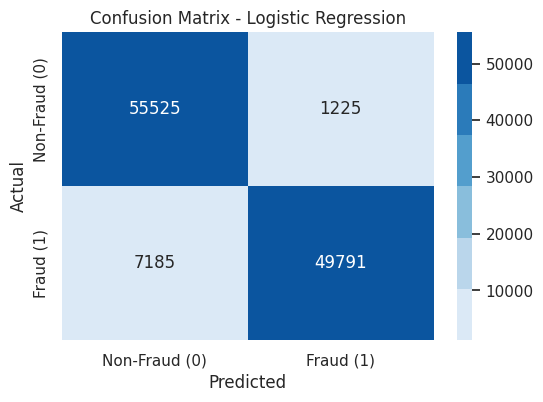

In [7]:
# B. Experiment with Different Models
# Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

# Get predicted probabilities
y_pred_prob_log = log_reg.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Compute ROC AUC score
roc_auc_log = roc_auc_score(y_test, y_pred_prob_log)
print("ROC AUC Score for Logistic Regression:", roc_auc_log)

# Confusion Matrix and Classification Report
print("Logistic Regression:\n", classification_report(y_test, y_pred_log))
cm = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap=custom_cmap, fmt='g')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['Non-Fraud (0)', 'Fraud (1)'])
plt.yticks([0.5, 1.5], ['Non-Fraud (0)', 'Fraud (1)'])
plt.show()

Naive Bayes:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93     56750
           1       1.00      0.85      0.92     56976

    accuracy                           0.92    113726
   macro avg       0.93      0.92      0.92    113726
weighted avg       0.93      0.92      0.92    113726

ROC AUC Score for Naive Bayes: 0.8967085886382952


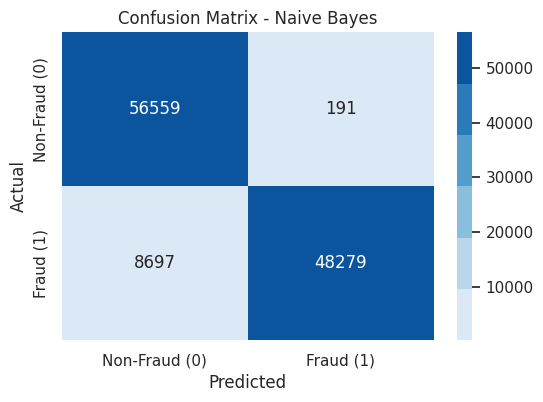

In [8]:
# Naive Bayes
naive_bayes = BernoulliNB()
naive_bayes.fit(X_train, y_train)
y_pred_nb = naive_bayes.predict(X_test)

# Get predicted probabilities
y_pred_prob_nb = naive_bayes.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Compute ROC AUC score
roc_auc_nb = roc_auc_score(y_test, y_pred_prob_nb)
print("Naive Bayes:\n", classification_report(y_test, y_pred_nb))
print("ROC AUC Score for Naive Bayes:", roc_auc_nb)

cm = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap=custom_cmap, fmt='g')
plt.title('Confusion Matrix - Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['Non-Fraud (0)', 'Fraud (1)'])
plt.yticks([0.5, 1.5], ['Non-Fraud (0)', 'Fraud (1)'])
plt.show()

Random Forest:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

ROC AUC Score for Random Forest: 0.9999215285947742


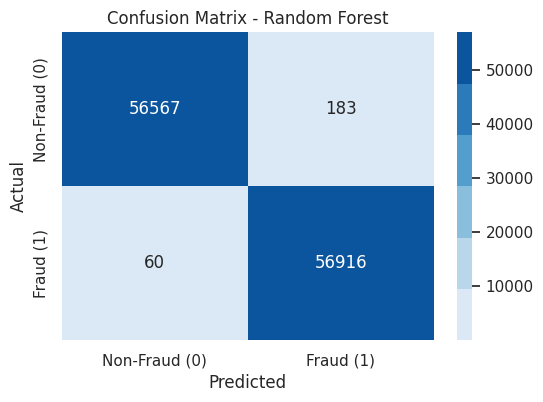

In [9]:
# Random Forest Classifier
random_forest = RandomForestClassifier(random_state=42, n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)

# Get predicted probabilities
y_pred_prob_rf = random_forest.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Compute ROC AUC score
roc_auc_rf = roc_auc_score(y_test, y_pred_prob_rf)
print("Random Forest:\n", classification_report(y_test, y_pred_rf))
print("ROC AUC Score for Random Forest:", roc_auc_rf)

cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap=custom_cmap, fmt='g')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['Non-Fraud (0)', 'Fraud (1)'])
plt.yticks([0.5, 1.5], ['Non-Fraud (0)', 'Fraud (1)'])
plt.show()

DBSCAN (Test Set):
               precision    recall  f1-score   support

           0       0.49      0.92      0.64     56750
           1       0.42      0.06      0.11     56976

    accuracy                           0.49    113726
   macro avg       0.46      0.49      0.37    113726
weighted avg       0.46      0.49      0.37    113726

ROC AUC Score for DBSCAN (Test Set): 0.4888113236023638


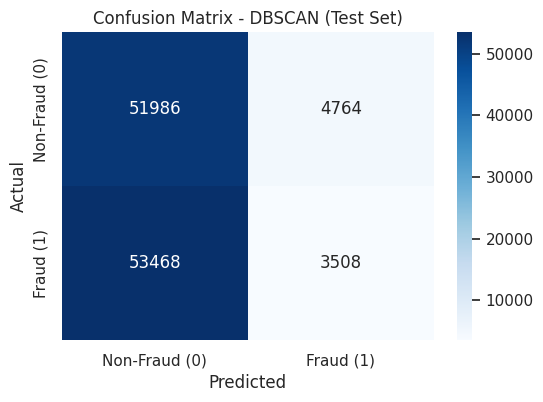

In [6]:
# DBSCAN model and predictions on training set
dbscan = DBSCAN(eps=0.1, min_samples=9)
dbscan.fit(X_train)

# Predict on test set using the DBSCAN model
dbscan_preds_test = dbscan.fit_predict(X_test)

# Convert -1 (anomalies) to 1 (fraud) and others to 0 (non-fraud)
dbscan_preds_test = [1 if x == -1 else 0 for x in dbscan_preds_test]

# Evaluation on the test set
print("DBSCAN (Test Set):\n", classification_report(y_test, dbscan_preds_test))
roc_auc_dbscan = roc_auc_score(y_test, dbscan_preds_test)
print("ROC AUC Score for DBSCAN (Test Set):", roc_auc_dbscan)

# Confusion Matrix for the test set
cm = confusion_matrix(y_test, dbscan_preds_test)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
plt.title('Confusion Matrix - DBSCAN (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['Non-Fraud (0)', 'Fraud (1)'])
plt.yticks([0.5, 1.5], ['Non-Fraud (0)', 'Fraud (1)'])
plt.show()

cpu
Epoch [10/100], Loss: 0.6673
Epoch [20/100], Loss: 0.6159
Epoch [30/100], Loss: 0.5213
Epoch [40/100], Loss: 0.3888
Epoch [50/100], Loss: 0.2643
Epoch [60/100], Loss: 0.2114
Epoch [70/100], Loss: 0.2004
Epoch [80/100], Loss: 0.1961
Epoch [90/100], Loss: 0.1922
Epoch [100/100], Loss: 0.1896
Multilayer Perceptron (MLP):
               precision    recall  f1-score   support

           0       0.90      0.98      0.94     56750
           1       0.98      0.89      0.93     56976

    accuracy                           0.93    113726
   macro avg       0.94      0.93      0.93    113726
weighted avg       0.94      0.93      0.93    113726

ROC AUC Score for MLP: 0.967384966480979


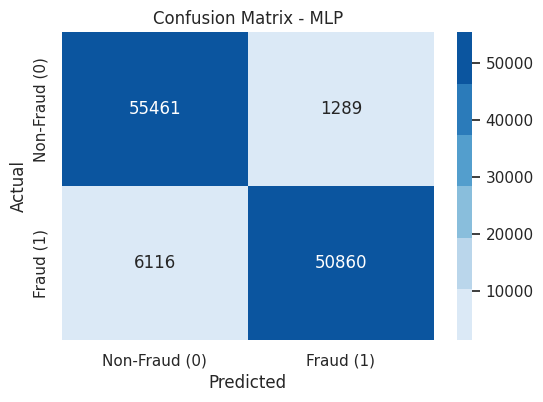

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim

# Check for GPU availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

# Convert data to PyTorch tensors and transfer them to the GPU
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long).to(device)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long).to(device)

# Define the MLP model
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 50)
        self.fc2 = nn.Linear(50, 30)
        self.fc3 = nn.Linear(30, 30)
        self.fc4 = nn.Linear(30, 50)
        self.output = nn.Linear(50, 2)  # Binary classification

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        x = self.output(x)
        return x

# Instantiate the model and move it to the GPU
model = MLP().to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    # Print progress
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Model evaluation
model.eval()
with torch.no_grad():
    y_pred_mlp = torch.argmax(model(X_test_tensor), dim=1).cpu().numpy()
    y_pred_prob_mlp = torch.softmax(model(X_test_tensor), dim=1)[:, 1].cpu().numpy()  # Probabilities for positive class

# Compute ROC AUC score
roc_auc_mlp = roc_auc_score(y_test, y_pred_prob_mlp)
print("Multilayer Perceptron (MLP):\n", classification_report(y_test, y_pred_mlp))
print("ROC AUC Score for MLP:", roc_auc_mlp)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_mlp)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap=custom_cmap, fmt='g')
plt.title('Confusion Matrix - MLP')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['Non-Fraud (0)', 'Fraud (1)'])
plt.yticks([0.5, 1.5], ['Non-Fraud (0)', 'Fraud (1)'])
plt.show()

              precision    recall  f1-score   support

           0       0.52      1.00      0.69     56750
           1       0.98      0.10      0.18     56976

    accuracy                           0.55    113726
   macro avg       0.75      0.55      0.43    113726
weighted avg       0.75      0.55      0.43    113726

ROC AUC Score:  0.5485510937753217


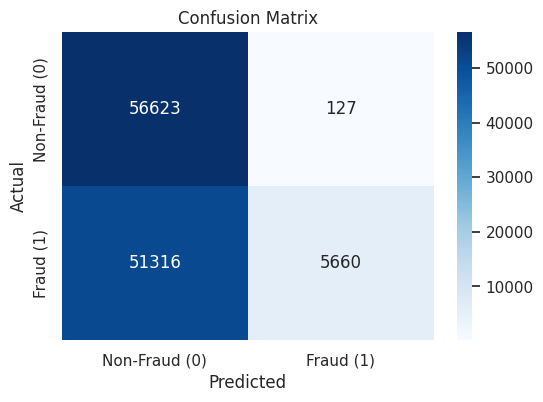

In [8]:
#isolation forest
from sklearn.ensemble import IsolationForest
iso_forest = IsolationForest(contamination=0.05, random_state=101)
iso_forest.fit(X_train)

# Predict on X_test
iso_preds = iso_forest.predict(X_test)

# Convert -1 (anomalies) to 1 (fraud) and 1 (normal) to 0 (non-fraud)
iso_preds = [1 if x == -1 else 0 for x in iso_preds]

# Evaluate the results
print(classification_report(y_test, iso_preds))
roc_auc = roc_auc_score(y_test, iso_preds)
print("ROC AUC Score: ", roc_auc)

# Plot the confusion matrix
cm = confusion_matrix(y_test, iso_preds)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

# Add labels, title, and axis ticks
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['Non-Fraud (0)', 'Fraud (1)'])
plt.yticks([0.5, 1.5], ['Non-Fraud (0)', 'Fraud (1)'])
plt.show()

              precision    recall  f1-score   support

           0       0.51      0.98      0.67     56750
           1       0.76      0.08      0.14     56976

    accuracy                           0.53    113726
   macro avg       0.64      0.53      0.41    113726
weighted avg       0.64      0.53      0.41    113726

ROC AUC Score:  0.5264025536063102
Confusion Matrix:


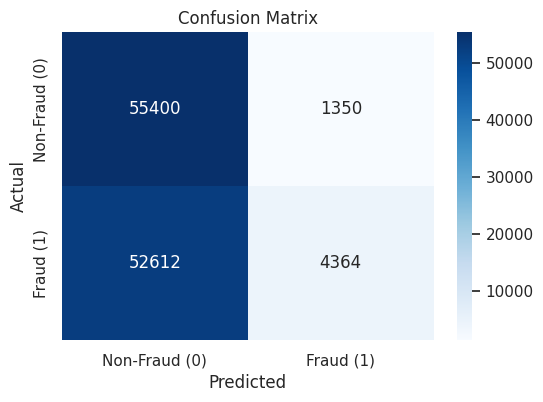

In [9]:
#one-class SVM
from sklearn.svm import OneClassSVM
oc_svm = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.05)

# Fit the model on the training data
oc_svm.fit(X_train)

# Predict on the test data (returns -1 for anomalies and 1 for normal data)
svm_preds = oc_svm.predict(X_test)

# Convert -1 (anomalies) to 1 (fraud) and 1 (normal) to 0 (non-fraud)
svm_preds = [1 if x == -1 else 0 for x in svm_preds]

# Evaluate the results
print(classification_report(y_test, svm_preds))
roc_auc = roc_auc_score(y_test, svm_preds)
print("ROC AUC Score: ", roc_auc)
print("Confusion Matrix:")

# Plot the confusion matrix
cm = confusion_matrix(y_test, svm_preds)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

# Add labels, title, and axis ticks
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['Non-Fraud (0)', 'Fraud (1)'])
plt.yticks([0.5, 1.5], ['Non-Fraud (0)', 'Fraud (1)'])
plt.show()

              precision    recall  f1-score   support

           0       0.49      0.93      0.64     56750
           1       0.35      0.04      0.06     56976

    accuracy                           0.48    113726
   macro avg       0.42      0.48      0.35    113726
weighted avg       0.42      0.48      0.35    113726

ROC AUC Score:  0.4845200282180796
Confusion Matrix:
[[52990  3760]
 [54965  2011]]


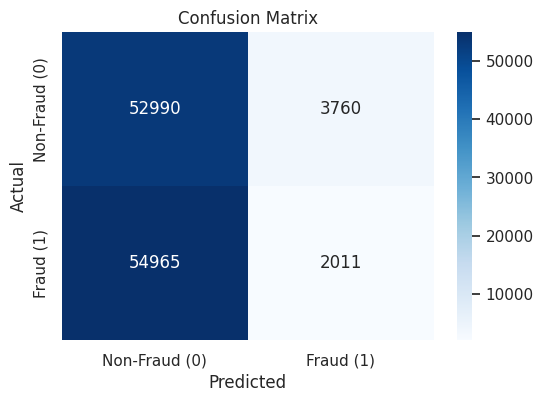

In [10]:
#LOF
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors=10, contamination=0.05, novelty=True)  # Set novelty=True for test-time prediction
lof.fit(X_train)

# Predict on the test data (returns -1 for anomalies and 1 for normal data)
lof_preds_test = lof.predict(X_test)

# Convert -1 (anomalies) to 1 (fraud) and 1 (normal) to 0 (non-fraud)
lof_preds_test = [1 if x == -1 else 0 for x in lof_preds_test]

# Evaluate the results
print(classification_report(y_test, lof_preds_test))
roc_auc = roc_auc_score(y_test, lof_preds_test)
print("ROC AUC Score: ", roc_auc)
print("Confusion Matrix:")
print(confusion_matrix(y_test, lof_preds_test))

# Plot the confusion matrix
cm = confusion_matrix(y_test, lof_preds_test)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')

# Add labels, title, and axis ticks
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['Non-Fraud (0)', 'Fraud (1)'])
plt.yticks([0.5, 1.5], ['Non-Fraud (0)', 'Fraud (1)'])
plt.show()

Epoch 1/50
12795/12795 ━━━━━━━━━━━━━━━━━━━━ 36s 3ms/step - loss: 0.4821 - val_loss: 0.1369
Epoch 2/50
12795/12795 ━━━━━━━━━━━━━━━━━━━━ 33s 3ms/step - loss: 0.1801 - val_loss: 0.1395
Epoch 3/50
12795/12795 ━━━━━━━━━━━━━━━━━━━━ 33s 3ms/step - loss: 0.1550 - val_loss: 0.1417
Epoch 4/50
12795/12795 ━━━━━━━━━━━━━━━━━━━━ 33s 3ms/step - loss: 0.1405 - val_loss: 0.1465
Epoch 5/50
12795/12795 ━━━━━━━━━━━━━━━━━━━━ 35s 3ms/step - loss: 0.1320 - val_loss: 0.1524
Epoch 6/50
12795/12795 ━━━━━━━━━━━━━━━━━━━━ 33s 3ms/step - loss: 0.1205 - val_loss: 0.1560
Epoch 7/50
12795/12795 ━━━━━━━━━━━━━━━━━━━━ 33s 3ms/step - loss: 0.1146 - val_loss: 0.1501
Epoch 8/50
12795/12795 ━━━━━━━━━━━━━━━━━━━━ 34s 3ms/step - loss: 0.1074 - val_loss: 0.1641
Epoch 9/50
12795/12795 ━━━━━━━━━━━━━━━━━━━━ 33s 3ms/step - loss: 0.1039 - val_loss: 0.1713
Epoch 10/50
12795/12795 ━━━━━━━━━━━━━━━━━━━━ 32s 3ms/step - loss: 0.1017 - val_loss: 0.1735
Epoch 11/50
12795/12795 ━━━━━━━━━━━━━━━━━━━━ 33s 3ms/step - loss: 0.0978 - val_loss: 0.17

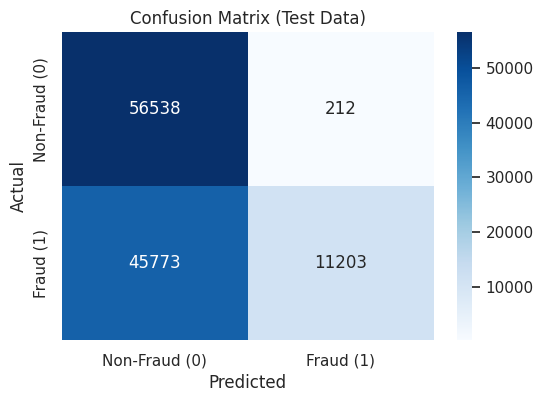

In [13]:
#auto-encoder
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
import tensorflow as tf
def build_autoencoder(input_dim):
    input_layer = Input(shape=(input_dim,))
    
    # Encoder
    encoded = Dense(32, activation='relu', kernel_regularizer=l2(0.001))(input_layer)
    encoded = Dropout(0.2)(encoded)
    encoded = Dense(16, activation='relu', kernel_regularizer=l2(0.001))(encoded)
    encoded = Dense(8, activation='relu', kernel_regularizer=l2(0.001))(encoded)
    
    # Latent space
    latent = Dense(4, activation='relu')(encoded)
    
    # Decoder
    decoded = Dense(8, activation='relu', kernel_regularizer=l2(0.001))(latent)
    decoded = Dropout(0.2)(decoded)
    decoded = Dense(16, activation='relu', kernel_regularizer=l2(0.001))(decoded)
    decoded = Dense(32, activation='relu', kernel_regularizer=l2(0.001))(decoded)
    output_layer = Dense(input_dim, activation='linear')(decoded)
    
    autoencoder = Model(inputs=input_layer, outputs=output_layer)
    return autoencoder

# Build and compile the autoencoder
autoencoder = build_autoencoder(X_train.shape[1])
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='mse')

# Train the model on X_train
autoencoder.fit(
    X_train, X_train,
    epochs=50,
    batch_size=32,
    shuffle=True,
    validation_split=0.1
)

# Reconstruct both X_train and X_test
reconstructed_train = autoencoder.predict(X_train)
reconstructed_test = autoencoder.predict(X_test)

# Calculate reconstruction error
mse_train = np.mean(np.power(X_train - reconstructed_train, 2), axis=1)
mse_test = np.mean(np.power(X_test - reconstructed_test, 2), axis=1)

# Set a threshold for anomaly detection based on training data
threshold = np.percentile(mse_train, 90)  # Adjust threshold (90th percentile)

# Predict anomalies
autoen_preds_train = np.where(mse_train > threshold, 1, 0)  # 1: anomaly (fraud), 0: normal
autoen_preds_test = np.where(mse_test > threshold, 1, 0)

# Evaluate the model on test data
print("Test Data Evaluation")
print(classification_report(y_test, autoen_preds_test))
roc_auc = roc_auc_score(y_test, autoen_preds_test)
print("ROC AUC Score: ", roc_auc)

# Plot the confusion matrix for test data
cm = confusion_matrix(y_test, autoen_preds_test)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')

# Add labels, title, and axis ticks
plt.title('Confusion Matrix (Test Data)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['Non-Fraud (0)', 'Fraud (1)'])
plt.yticks([0.5, 1.5], ['Non-Fraud (0)', 'Fraud (1)'])
plt.show()